#Importing required libraries

In [26]:
import pandas as pd
import numpy as np
from math import *
from statistics import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100

In [27]:
import matplotlib.animation as animation

#Linear Regression
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression.

#Bakery Demand Example

Suppose that a bakery owner want to predict the demands for some item (say cakes). He has recorded the demand for past 20 days. He would like to find out the demand for next few days to be prepared for orders.


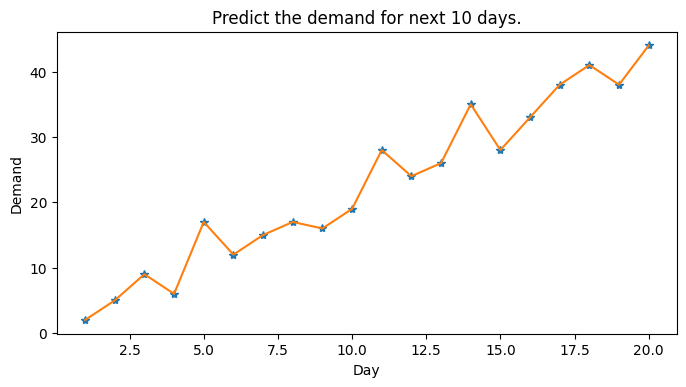

In [28]:
day = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
demand = [2,5,9,6,17,12,15,17,16,19,28,24,26,35,28,33,38,41,38,44]
plt.plot(day,demand,'*')
plt.plot(day,demand)

plt.xlabel("Day")
plt.ylabel("Demand")
plt.title("Predict the demand for next 10 days.")

plt.show()

In simple linear regression we try to approximate the relationship between two variables (dependent & independent) using linear equation. The linear relationship between two variables is defined by:

<h1 align="center"> Y = M * X + C <h1>

where,
>Y = dependent variable. <br>
>X = independent variable. <br>
>M = slope of the line. <br>
>C = intercept of the line. <br> 





#Finding the equation for best fit line.


Sample Dataset

In [29]:
train_X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
train_Y = [2,5,9,6,17,12,15,17,16,19,28,24,26,35,28,33,38,41,38,44]
test_X = [21,22,23,24,25,26,27,28,29,30]
test_Y = [43,49,53,51,55,58,54,59,64,65]

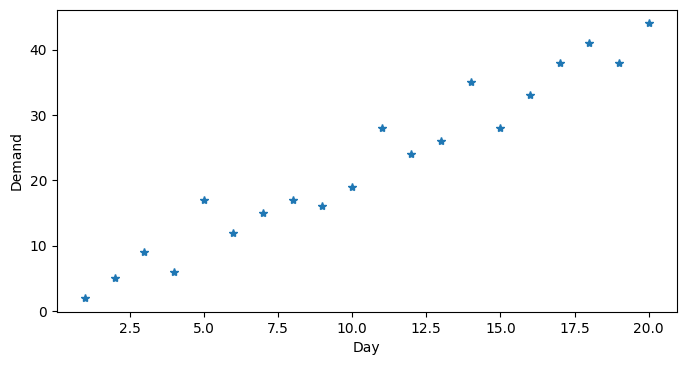

In [30]:
plt.plot(train_X,train_Y,'*')
plt.xlabel("Day")
plt.ylabel("Demand")
plt.show()

In [18]:
print("Length of Training Set : ",len(train_Y))
print("Length of Testing Set : ",len(test_Y))

Length of Training Set :  20
Length of Testing Set :  10


Hit & Trial Method

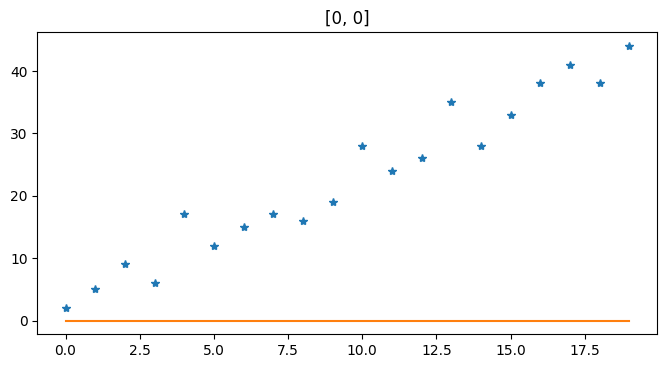

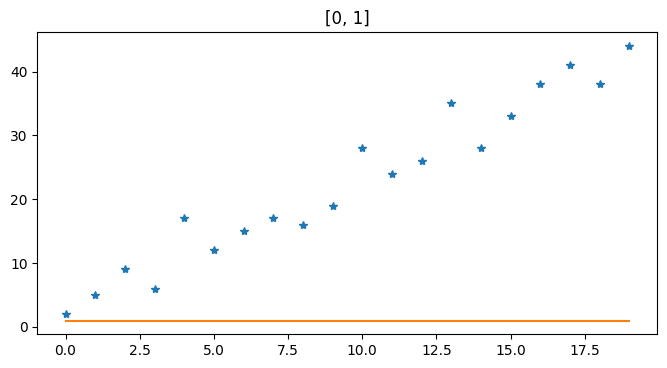

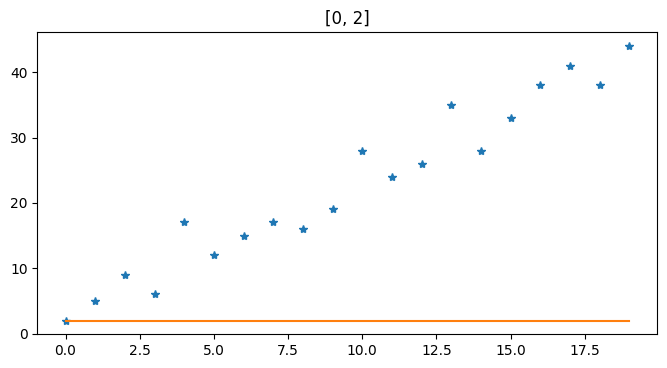

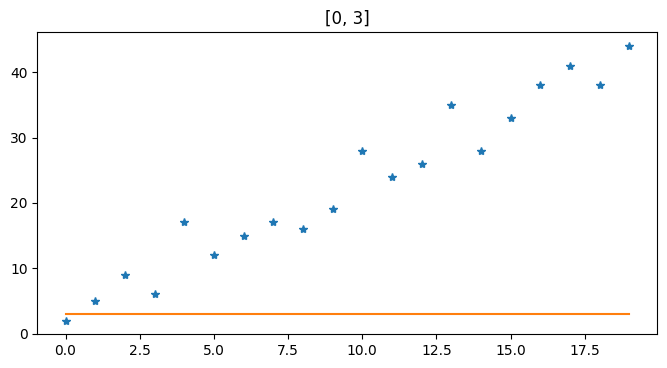

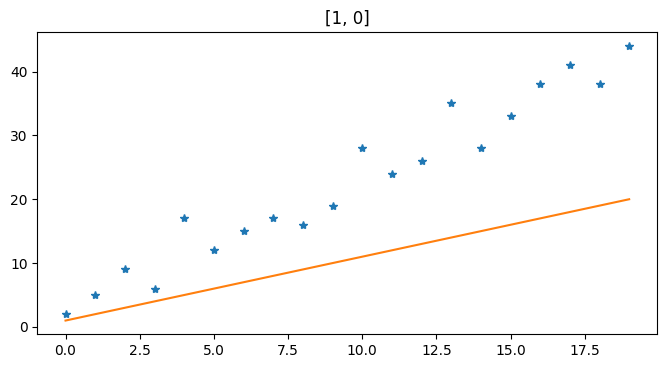

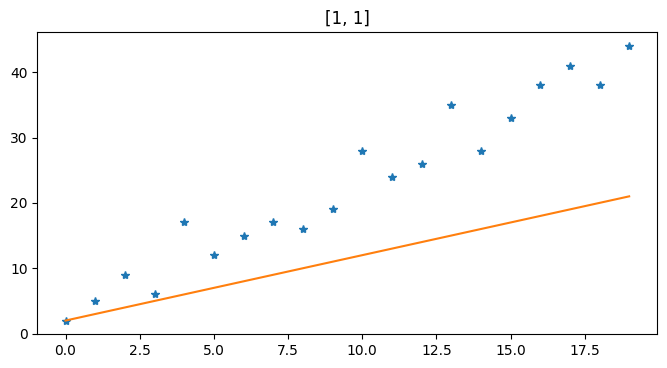

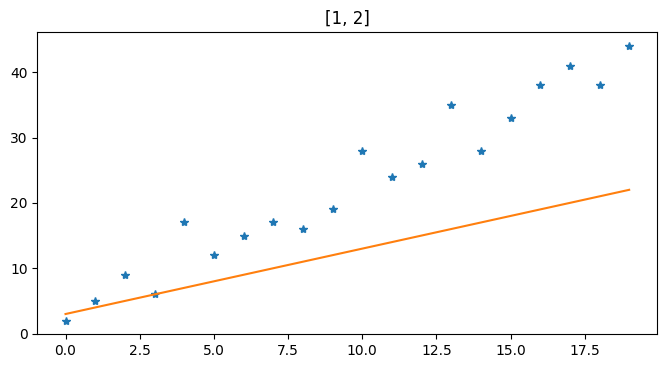

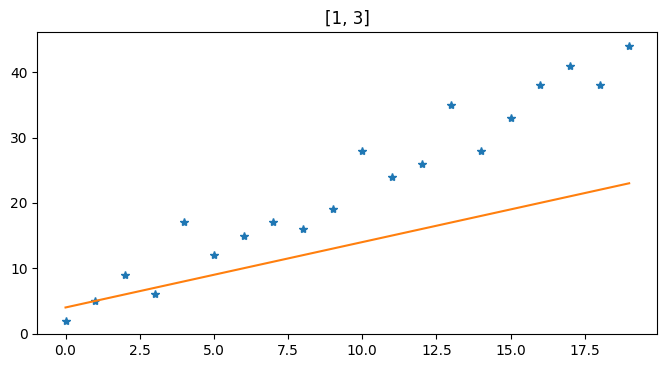

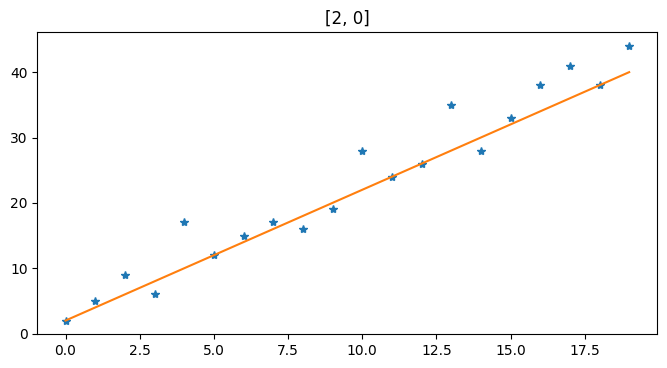

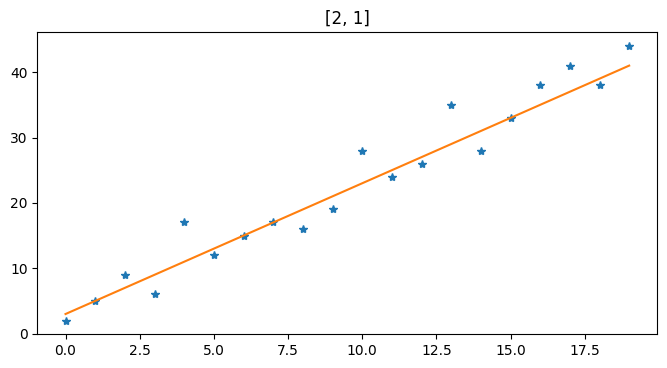

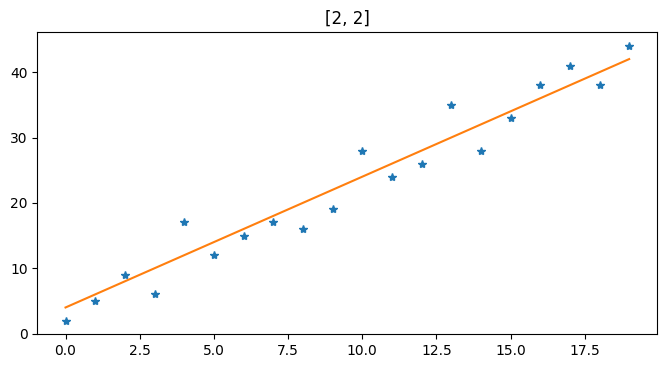

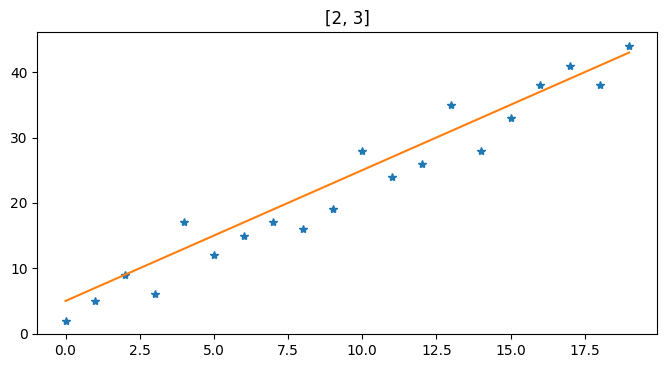

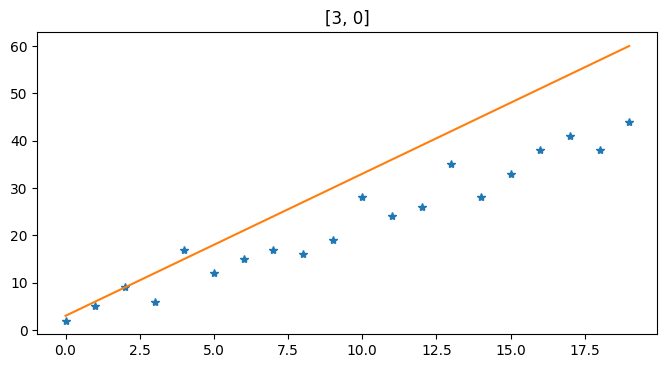

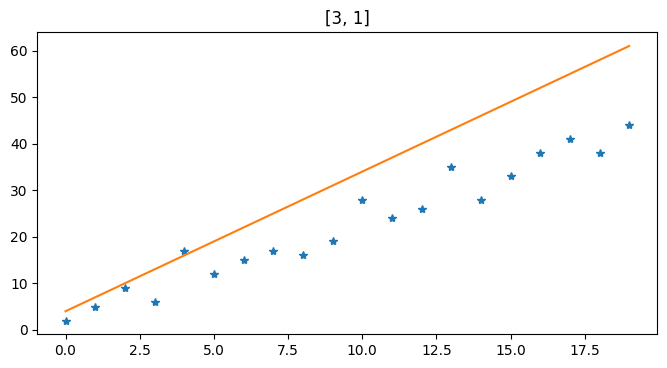

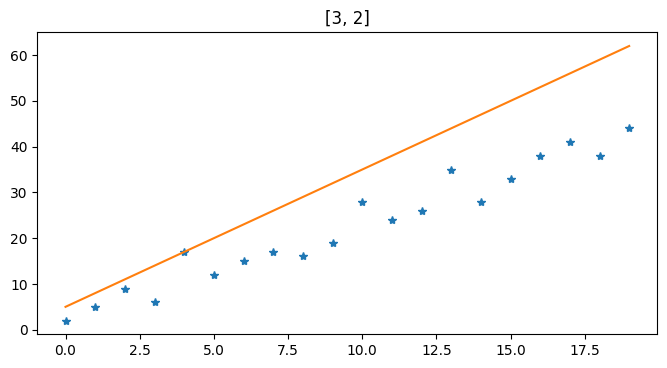

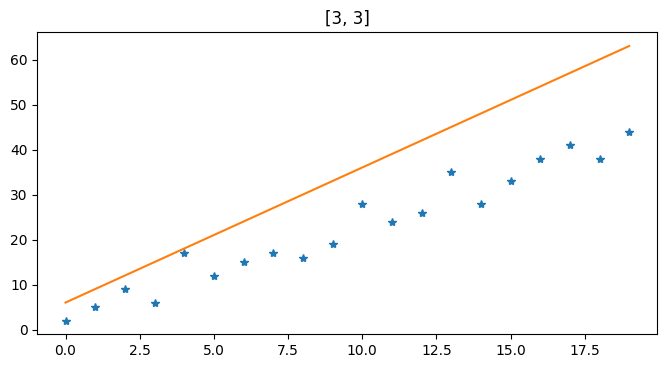

In [19]:
w = 0 # slope
b = 0 # intercept

dat = {}

for w in np.arange(0,4,1):
  for b in np.arange(0,4,1):
    yp = np.array(train_X) * w + b
    plt.plot(train_Y,"*")
    plt.plot(yp)
    k = [w,b]
    plt.title(k)
    plt.show()

# Least Squares Method
To make a linear regression model we need to find out the slope and intercept for the best fit line. Best fit line is the line with the least distance from all points. To find the best fit line follow the steps given below:
The slope M & intercept C for the best fit line can be calculated as: 

Slope of best-fit line, <br>
<h2 align = "center">
 $M = \frac{\sum_{i}^n (X-\bar{X})*(Y-\bar{Y}) }{\sum_{i}^n (X-\bar{X})^2 } $
<br><br>
</h3>
Intercept of best-fit line,<br>
<h2 align = "center">

 $C = Y - M* \bar{X} $
</h3>

<br>





mean of x :  10.5  mean of y :  22.65


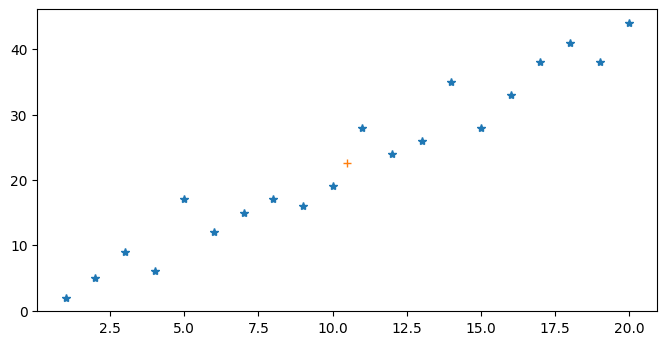

In [31]:
# Calculation of Mean of X & Y.
my = mean(train_Y)
mx = mean(train_X)
print("mean of x : ",mx," mean of y : ",my)
plt.plot(train_X,train_Y,'*')
plt.plot(mx,my,'+')
plt.show()

In [32]:
# sxy is the calculation of numerator part in the formula.
sxy = (np.array(train_Y)-my) * (np.array(train_X)-mx)
sxy = sum(sxy)

# sxx is the calculation of denominator part in the formula.
sxx = (np.array(train_X)-mx) **2
sxx = sum(sxx)

#Calculation of Slope.
m = sxy/sxx
print("Slope, M = ",m)
#Calculation of Intercept.
b = my - (mx * m)
print("Intercept, B = ",b) 


Slope, M =  2.0999999999999996
Intercept, B =  0.6000000000000014


#Predictions

In [33]:
Y_predicted = np.array(test_X) *m + b
model = np.array(train_X) *m + b

# Visualizing results

The blue stars represent the training data.

1.   The blue stars represent the training data.
2.   The approximation/ best-fit line (model) is shown by green line which is extended and shown in red colour for predictions.
3.   The red plus signs represent the actual data (test).

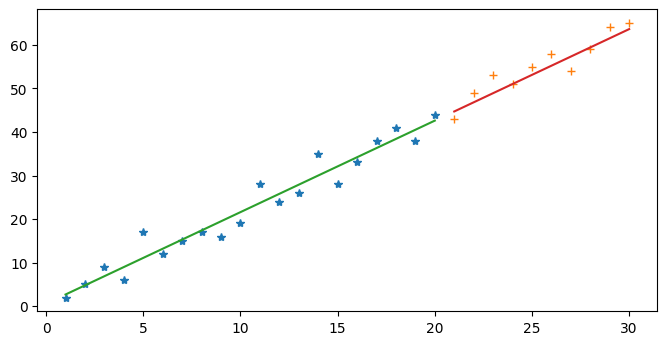

In [23]:
#plot training data
plt.plot(train_X,train_Y,'*')

#plot test data
plt.plot(test_X,test_Y,'+')

#plot fitted model
plt.plot(train_X,model)

#plot Predictions made by model
plt.plot(test_X,Y_predicted)
plt.show()

#Linear Regression Class

In [24]:
class linear_reg:

  def __init__(self):
    self.m = None
    self.c = None

  def fit(self,train_x,train_y):

    XXSQ = []
    XY = []
    YF = []
    TR = []

    xs = sum(train_x)/len(train_x)
    ys = sum(train_y)/len(train_y)

    for x,y in zip(train_x,train_y):
      xx = x - xs
      yy = y - ys
      xy = xx*yy
      xxsq = xx*xx

      XY.append(xy)
      XXSQ.append(xxsq)
  
    self.m = sum(XY)/sum(XXSQ)
    self.c = ys - xs*self.m 
    print('Slope = ',self.m,'Intercept = ',self.c)
    
    for x,y in zip(train_x,train_y):
      yfit = self.m * x + self.c
      error = sqrt((y-yfit)*(y-yfit))
      YF.append(yfit)
      TR.append(error)
    print('Training Error (MSQRT) = ',mean(TR))
    plt.plot(train_x,train_y,'*')
    plt.plot(train_x,YF)

  def predict(self,test_x,test_y):
    YP = []
    ER = []
    for x,y in zip(test_x,test_y):
      ypred = self.m * x + self.c
      error = sqrt((y-ypred)*(y-ypred))
      YP.append(ypred)
      ER.append(error)
     
    print('Evaluation Error (MSQRT) = ',mean(ER))
    print(YP)
    plt.plot(test_x,test_y,'*')
    plt.plot(test_x,YP,'+')

Slope =  2.0999999999999996 Intercept =  0.6000000000000014
Training Error (MSQRT) =  2.3199999999999994


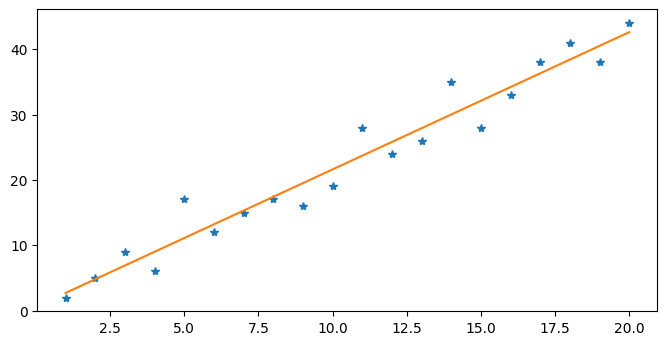

In [25]:
lr = linear_reg()
lr.fit(train_X,train_Y)